In [1]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig



In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=6, n_classes=3, n_informative=3)

print(X.shape)

(1000, 6)


In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=3)

X_selected = fs.fit_transform(X, y)

print(X_selected.shape)

(1000, 3)


In [4]:
print(fs.scores_)
print(fs.pvalues_)
print(fs.get_support())

[ 58.46557639  15.62293943  15.94968169 304.2409385    1.98309006
   0.56408059]
[9.78698749e-025 2.08541794e-007 1.51931040e-007 7.16540537e-104
 1.38185816e-001 5.69064393e-001]
[ True False  True  True False False]


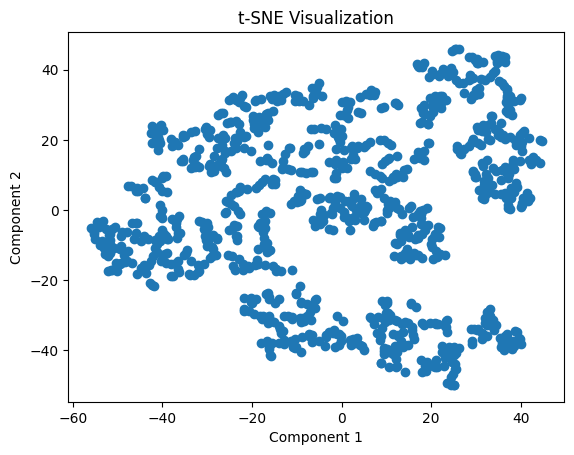

In [5]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

# Применение t-SNE
tsne = TSNE(n_components=2, perplexity=15)
X_embedded = tsne.fit_transform(X)

# Визуализация
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X)
print(X_embedded.shape)



(1000, 2)


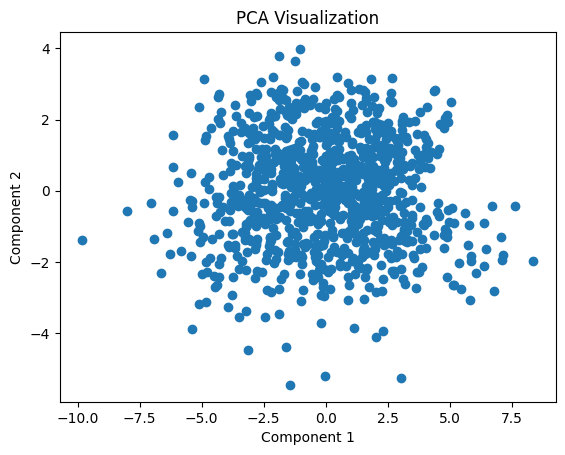

In [8]:
# Визуализация
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.title('PCA Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()